In [58]:
import os
import re
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from normflows.distributions import DiagGaussian
from dataset.TwoMoonDataset import TwoMoonDataset
import torch
from flow_models.PatchFlow import PatchFlow
import torchvision as tv
import numpy as np

In [73]:
model = 'patch_flow_mnist'
version = 0
selected_checkpoint = 32

In [74]:
regex = re.compile(r'epoch=(\d+)-step=\d+\.ckpt')
path_to_checkpoint = f'../tb_logs/{model}/version_{version}'
h_params = f'{path_to_checkpoint}/hparams.yaml'
checkpoints_path = f'{path_to_checkpoint}/checkpoints/'
selected_checkpoint_file = None
for filename in os.listdir(checkpoints_path):
    match = regex.match(filename)
    if match:
        epoch_index = int(match.group(1))
        if epoch_index == selected_checkpoint:
            selected_checkpoint_file = filename
checkpoint_path = os.path.join(checkpoints_path, selected_checkpoint_file)
print(f'h_params:{h_params}')
print(f'Checkpoint:{checkpoint_path}')

h_params:../tb_logs/patch_flow_mnist/version_0/hparams.yaml
Checkpoint:../tb_logs/patch_flow_mnist/version_0/checkpoints/epoch=32-step=15000.ckpt


In [75]:
flow = PatchFlow.load_from_checkpoint(checkpoint_path=checkpoint_path, hparams_file=h_params, map_location='cpu')

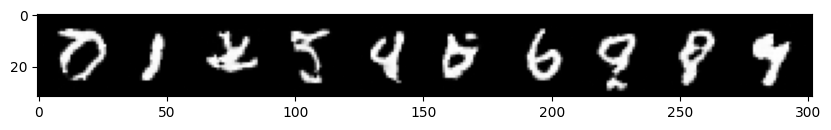

In [86]:
num_sample = 1
num_classes = 10
with torch.no_grad():
    y = torch.arange(num_classes).repeat(num_sample)
    x, _ = flow.model.sample(y=y)
    x_ = torch.clamp(x, 0, 1)
    plt.figure(figsize=(10, 10))
    plt.imshow(np.transpose(tv.utils.make_grid(x_, nrow=num_classes).cpu().numpy(), (1, 2, 0)))
    plt.show()